In [ ]:
from google.colab import files
uploaded = files.upload()

Saving newsfeed - News (1).csv to newsfeed - News (1).csv


In [ ]:
import pandas as pd
data = pd.read_csv('/content/newsfeed - News (1).csv')
df=data.copy()

In [ ]:
df['description'] = df ['Description']

In [ ]:
import nltk
nltk.download('punkt')
df.dropna(subset=["Description"],inplace=True)
for i, row in df.iterrows():
   text = row["Description"]
   row["Description"] = nltk.word_tokenize(text)
print(i,df["Description"])

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


962 0      [Larsen, &, amp, ;, Toubro, (, L, &, amp, ;, T...
1      [The, regulator, #, 39, ;, s, action, ,, which...
2      [Brent, crude, futures, edged, up, 2, cents, t...
3      [The, firm, has, signed, a, $, 120-million, (,...
4      [For, retail, investors, ,, spotting, mis-gove...
                             ...                        
958    [PB, Fintech, reports, Q3, earnings, ., Net, l...
959    [Cochin, Shipyard, reports, Q3, earnings, ., N...
960    [Metropolis, Health, reports, Q3, earnings, .,...
961    [Oil, India, (, @, OilIndiaLimited, ), reports...
962    [Dilip, Buildcon, reports, Q3, earnings, ., Ne...
Name: Description, Length: 963, dtype: object


In [ ]:
uploaded_2 = files.upload()

Saving ticker.csv to ticker.csv


In [ ]:
data_2 = pd.read_csv('/content/ticker.csv')
df2 = data_2.copy()

In [ ]:
df['match']=df2['SYMBOL'] +" " + df2['NAME OF COMPANY']
df['SYMBOL'] = df2['SYMBOL']

In [ ]:
import re

df['text'] = df['Title'].astype(str) + ' ' + df['Description'].astype(str)
def extract_company_name(text):
    pattern = r'\b(?:{})\b'.format('|'.join(df2['SYMBOL']))
    matches = re.findall(pattern, text, re.IGNORECASE)
    return str(set(matches))
df['common_company_names'] = df['text'].apply(extract_company_name)
df2['names'] = df2['SYMBOL'].astype(str) + ' ' + df2['NAME OF COMPANY'].astype(str)
common_company_names = set(df['common_company_names'].explode().unique()).intersection(set(df2['names'].unique()))
j=0
'''for i in df['common_company_names']:
  if(i):
    j=j+1
    print(j,i)'''
#df.head(50)

"for i in df['common_company_names']:\n  if(i):\n    j=j+1\n    print(j,i)"

In [ ]:
!pip install fuzzywuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install python-Levenshtein

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 174.1/174.1 kB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 69.1 MB/s eta 0:00:00


In [ ]:
df2['match']=df2['SYMBOL'] +" " + df2['NAME OF COMPANY']
df['SYMBOL'] = df2['SYMBOL']

In [ ]:
from fuzzywuzzy import fuzz

for i, row in df.iterrows():

    # Get the current common company name as a list
    current_common_name = str(row['common_company_names']).replace('{','').replace('}','').replace('\'','').split(';')

    # Loop through all other rows to find matches
    for j, other_row in df2.iterrows():

        # Ignore the current row
        if i == j:
            continue

        # Check if the common company name matches
        other_common_name = str(other_row['match']).replace('{','').replace('}','').replace('\'','').split(';')
        #if set(other_common_name) == set(current_common_name):
            # If the company names are similar enough, store the symbol in a new column
        name_similarity = fuzz.token_set_ratio(other_common_name,' '.join(current_common_name))
        if name_similarity >= 80:
           # change the threshold as required
          df.at[i, 'Matched Symbol'] = other_row['SYMBOL']


In [ ]:
df['title'] = df['Title']
df['title'] = df['title'].str.split()
string = 'Adani Enterprises Limited ADANIENT'
for i,row in df.iterrows():
    common_from_title= str(row['title']).replace('{','').replace('}','').replace('\'','').split(';')
    common_company = str(string).replace('{','').replace('}','').replace('\'','').split(';')
    name_similarity = fuzz.token_set_ratio(common_from_title,' '.join(common_company))
    if name_similarity >= 80:
      df.at[i, 'Matched Symbol'] = 'ADANIENT'

In [ ]:
string = 'Adani Green Energy Limited ADANIGREEN'
for i,row in df.iterrows():
    common_from_title= str(row['title']).replace('{','').replace('}','').replace('\'','').split(';')
    common_company = str(string).replace('{','').replace('}','').replace('\'','').split(';')
    name_similarity = fuzz.token_set_ratio(common_from_title,' '.join(common_company))
    if name_similarity >= 80:
      df.at[i, 'Matched Symbol'] = 'ADANIGREEN'

In [ ]:
string = 'Adani Ports and Special Economic Zone Limited ADANIPORTS'
for i,row in df.iterrows():
    common_from_title= str(row['title']).replace('{','').replace('}','').replace('\'','').split(';')
    common_company = str(string).replace('{','').replace('}','').replace('\'','').split(';')
    name_similarity = fuzz.token_set_ratio(common_from_title,' '.join(common_company))
    if name_similarity >= 80:
      df.at[i, 'Matched Symbol'] = 'ADANIPORTS'

In [ ]:
string = 'Adani Power Limited ADANIPOWER'
for i,row in df.iterrows():
    common_from_title= str(row['title']).replace('{','').replace('}','').replace('\'','').split(';')
    common_company = str(string).replace('{','').replace('}','').replace('\'','').split(';')
    name_similarity = fuzz.token_set_ratio(common_from_title,' '.join(common_company))
    if name_similarity >= 80:
      df.at[i, 'Matched Symbol'] = 'ADANIPOWER'

In [ ]:
string = 'Adani Transmission Limited ADANITRANS'
for i,row in df.iterrows():
    common_from_title= str(row['title']).replace('{','').replace('}','').replace('\'','').split(';')
    common_company = str(string).replace('{','').replace('}','').replace('\'','').split(';')
    name_similarity = fuzz.token_set_ratio(common_from_title,' '.join(common_company))
    if name_similarity >= 80:
      df.at[i, 'Matched Symbol'] = 'ADANITRANS'

In [ ]:
string = 'ICICI Bank Limited ICICIBANK'
for i,row in df.iterrows():
    common_from_title= str(row['title']).replace('{','').replace('}','').replace('\'','').split(';')
    common_company = str(string).replace('{','').replace('}','').replace('\'','').split(';')
    name_similarity = fuzz.token_set_ratio(common_from_title,' '.join(common_company))
    if name_similarity >= 80:
      df.at[i, 'Matched Symbol'] = 'ICICIBANK'

In [ ]:
string = 'IndusInd Bank Limited INDUSINDBK'
for i,row in df.iterrows():
    common_from_title= str(row['title']).replace('{','').replace('}','').replace('\'','').split(';')
    common_company = str(string).replace('{','').replace('}','').replace('\'','').split(';')
    name_similarity = fuzz.token_set_ratio(common_from_title,' '.join(common_company))
    if name_similarity >= 80:
      df.at[i, 'Matched Symbol'] = 'INDUSINDBK'

In [ ]:
string = 'Hindustan Aeronautics Limited HAL '
for i,row in df.iterrows():
    common_from_title= str(row['title']).replace('{','').replace('}','').replace('\'','').split(';')
    common_company = str(string).replace('{','').replace('}','').replace('\'','').split(';')
    name_similarity = fuzz.token_set_ratio(common_from_title,' '.join(common_company))
    if name_similarity >= 80:
      df.at[i, 'Matched Symbol'] = 'HAL'

In [ ]:
string = 'Hindustan Zinc HCC'
for i,row in df.iterrows():
    common_from_title= str(row['title']).replace('{','').replace('}','').replace('\'','').split(';')
    common_company = str(string).replace('{','').replace('}','').replace('\'','').split(';')
    name_similarity = fuzz.token_set_ratio(common_from_title,' '.join(common_company))
    if name_similarity >= 80:
      df.at[i, 'Matched Symbol'] = 'HCC'

In [ ]:
#df['Matched Symbol'].count()

In [ ]:
!pip install pandas-datareader

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from pandas_datareader import data as pdr
import yfinance as yfin
yfin.pdr_override()
#string = pdr.get_data_yahoo('ADANIENT.NS',start='2023-02-02',end='2023-02-04')
#string

In [ ]:
from pandas_datareader import data as pdr
import yfinance as yfin
import datetime as dt

yfin.pdr_override()
#mask=df['Matched Symbol'].notnull()
stock = {}
for index,row in df.iterrows():
  date = pd.to_datetime(row['Date'])
  date = date.date()
  start1 = date - pd.Timedelta(days=5)
  end1 = date
  start2 = date
  end2 = date + pd.Timedelta(days=5)
  start1=str(start1)
  end1=str(end1)
  start2=str(start2)
  end2=str(end2)

  #print(start)
  #print(end)
  x =pd.notna(row['Matched Symbol'])


  if (x):
    string1 = pdr.get_data_yahoo(str(x),start=start1,end=end1)
    df.loc[index,'before'] = (string1['High']+string1['Low']).mean()
    string2 = pdr.get_data_yahoo(str(x),start=start2,end=end2)
    df.loc[index,'after'] = (string2['High']+string2['Low']).mean()
    name = df.loc[index,'Matched Symbol']
    stock[name] = pd.DataFrame()
    string = pdr.get_data_yahoo(str(x),start=start1,end=end2)
    stock[name] = string
    if df.loc[index,'before'] >  df.loc[index,'after']:
       df.loc[index,'impact']="loss"
       df.loc[index,'value']=-1
    elif df.loc[index,'before']< df.loc[index,'after']:
       df.loc[index,'impact']="gain"
       df.loc[index,'value']=1
    else :
       df.loc[index,'impact']="neutral"
       df.loc[index,'value']=0
        #df.loc[index,'impact'] = pdr.get_data_yahoo(x,start=start,end=end)
        #df.head()



[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

In [ ]:
#print(stock)

In [ ]:


for index, row in df.iterrows():
    if pd.isna(df.loc[index, 'impact']):
        df = df.drop(index)

In [ ]:


#df.head()a

In [ ]:

#@title Default title text
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

# load the data into a pandas DataFrame


# extract the input and output columns
X = df['description']
y = df['value']

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# create a text vectorizer
vectorizer = TfidfVectorizer()

# transform the text data into numerical vectors
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

# train the model and make predictions
# ...



In [ ]:

import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

#load the datasedf = pd.read_csv('data.csv')
#replace missing values with 0
df = df.fillna(0)

#split the dataset into training and testing sets
X = df['description'] # features
y = df['value'] # target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#create a text vectorizer to convert the string input into a numeric format
vectorizer = TfidfVectorizer()

#transform the text data into numerical vectors
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

#train a random forest model
rfc = RandomForestClassifier(n_estimators=100, random_state=42)
rfc.fit(X_train, y_train)

#make predictions on the testing set
y_pred = rfc.predict(X_test)

#evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy*100,'%')

#calculate the precision

Accuracy: 81.89655172413794 %


In [ ]:
from sklearn.preprocessing import LabelEncoder

# load the dataset
#df = pd.read_csv('data.csv')

# create an instance of LabelEncoder
le = LabelEncoder()

# fit and transform the string column to numeric values
df['description'] = le.fit_transform(df['description'])


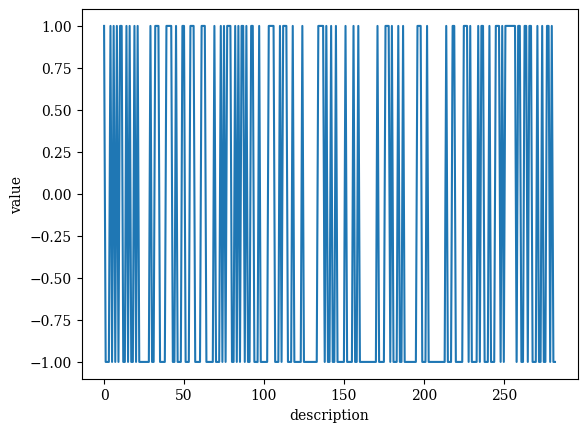

In [ ]:

#import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['font.serif'] = ['Times New Roman'] + mpl.rcParams['font.serif']

# load the dataset
#df = pd.read_csv('data.csv')

# replace missing values with 0
df = df.fillna(0)
sns.lineplot(data=df, x='description', y='value')

# show the plot
plt.show()

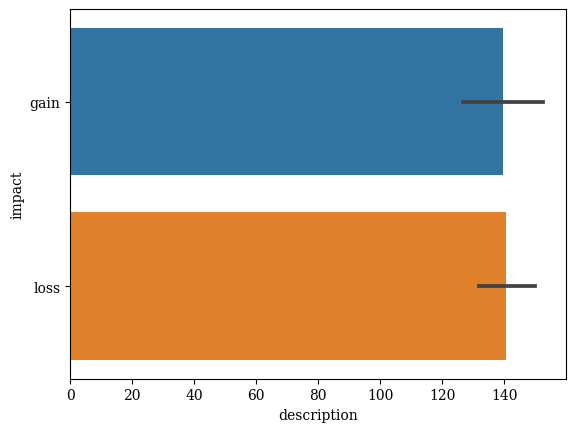

In [ ]:
#import pandas as pd

#import seaborn as sns
'''import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl'''

mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['font.serif'] = ['Times New Roman'] + mpl.rcParams['font.serif']

# load the dataset
#df = pd.read_csv('data.csv')

# replace missing values with 0
df = df.fillna(0)

# plot a bar chart using Seaborn
sns.barplot(data=df, x='description', y='impact')

# show the plot
plt.show()


In [ ]:
#df['Matched Symbol'][6]

'HCC'

In [ ]:



#df['Matched Symbol'].head(20)

In [ ]:
'''for i,row in df.iterrows():
  if(df.loc[i,'impact']=="gain"):
    print(row['Matched Symbol'])'''


'for i,row in df.iterrows():\n  if(df.loc[i,\'impact\']=="gain"):\n    print(row[\'Matched Symbol\'])'

In [ ]:
# Assuming the column you want to print is named "column_name"
print("these are stocks name   \n")
unique_values = df['Matched Symbol'].drop_duplicates().values
print(unique_values)
unique_df = pd.DataFrame(unique_values, columns=["Unique Values"])

print(unique_df)



these are stocks name   

['LT' 'HCC' 'NYKAA' 'HINDALCO' 'SEQUENT' 'RELIGARE' 'TIDEWATER'
 'PNBHOUSING' 'BSE' 'GAIL' 'WORTH' 'WESTLIFE' 'OLECTRA' 'PAYTM' 'HDFCLIFE'
 'DEVYANI' 'BHEL' 'VAIBHAVGBL' 'MARUTI' 'BEML' 'ABB' 'NTPC' 'TCS'
 'MPHASIS' 'SATIN' 'ACE' 'AJMERA' 'IDFCFIRSTB' 'MRPL' 'SUPRAJIT' 'INFY'
 'GRASIM' 'PVR' 'MARICO' 'STARPAPER' 'PFOCUS' 'CHALET' 'THERMAX' 'KSB'
 'NMDC' 'CYIENT' 'HAL' 'NOCIL' 'CIPLA' 'ALICON' 'TTKPRESTIG' 'PNCINFRA'
 'INDIGOPNTS' 'VESUVIUS' 'CRAFTSMAN' 'MANAPPURAM' 'APTUS' 'CAMPUS' 'BEL'
 'NCC' 'GLS' 'BRITANNIA' 'VOLTAS' 'TAKE' 'SAREGAMA' 'RITES' 'SHIVALIK'
 'PETRONET' 'BPCL' 'EMKAY' 'TRIVENI' 'ERIS' 'RPOWER' 'UFLEX' 'GRANULES'
 'PERSISTENT' 'RATNAMANI' 'RAINBOW' 'EQUITASBNK' 'LUPIN' 'ISGEC'
 'BALKRISIND' 'QUESS' 'TOTAL' 'WHIRLPOOL' 'RAYMOND' 'KAYA' 'ITC' 'TIMKEN'
 'GILLETTE' 'ZUARIIND' 'CERA' 'SUVENPHAR' 'COROMANDEL' 'GUJAPOLLO' 'HIKAL'
 'ACC' 'SCI' 'VAKRANGEE' 'FACT' 'FILATEX' 'ROSSARI' 'AFFLE' 'RELAXO'
 'ATULAUTO' 'MCX' 'COFORGE' 'INFIBEAM' 'SHANKARA' 'IEX'

In [ ]:
#stock[df['Matched Symbol'][0]]

Enter stock name from above list: ADANIENT


<Axes: xlabel='Date', ylabel='Close'>

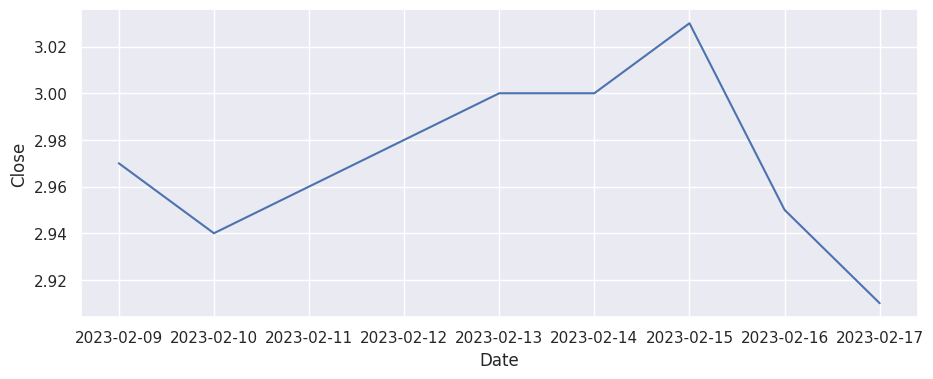

In [ ]:
# Get the user input for the stock symbol
symbol = input("Enter stock name from above list: ")

# Set the plot size
sns.set(rc={'figure.figsize':(10.8,4)})

# Plot the closing prices for the selected stock
sns.lineplot(stock[symbol],x='Date', y='Close')

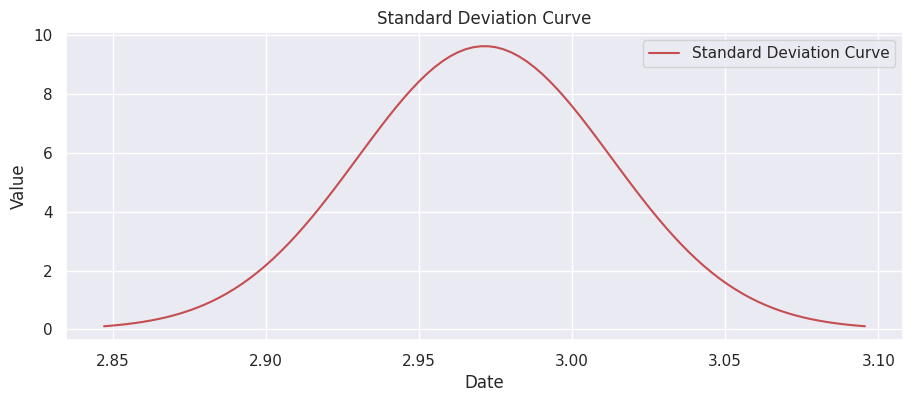

In [ ]:
'''import pandas as pd
import numpy as np
import matplotlib.pyplot as plt'''

# Assuming you have a DataFrame named 'df' with a column named 'values'
std_dev = stock[symbol]['Close'].std()
mean = stock[symbol]['Close'].mean()

# Generate data for the standard deviation curve
x = np.linspace(mean - 3 * std_dev, mean + 3 * std_dev, 100)
y = np.exp(-(x - mean)**2 / (2 * std_dev**2)) / (std_dev * np.sqrt(2 * np.pi))

# Plot the original data and the standard deviation curve
#plt.plot(stock[symbol], label='Data')
plt.plot(x, y, 'r', label='Standard Deviation Curve')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Standard Deviation Curve')
plt.legend()
plt.show()


In [ ]:
ss#import pandas as pd
#from sklearn.ensemble import RandomForestClassifier
#from sklearn.metrics import accuracy_score, precision_score,recall_score
#from sklearn.model_selection import train_test_split
#from sklearn.feature_extraction.text import TfidfVectorizer
#import matplotlib.pyplot as plt
#from sklearn.metrics import roc_curve, auc

# load the dataset
#df = pd.read_csv('data.csv')

# replace missing values with 0
#df = df.fillna(0)

# split the dataset into training and testing sets
X = df['description'] # features
y = df['value'] # target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# convert target variables to numpy array and reshape
y_train = y_train.values.reshape(-1, 1)
y_test = y_test.values.reshape(-1, 1)

# create a text vectorizer to convert the string input into a numeric format
vectorizer = TfidfVectorizer()

# transform the text data into numerical vectors
X_train = vectorizer.fit_transform(X_train.astype('U')) # Convert to Unicode
X_test = vectorizer.transform(X_test.astype('U')) # Convert to Unicode

# train a random forest model
rfc = RandomForestClassifier(n_estimators=100, random_state=42)
rfc.fit(X_train, y_train)

# make predictions on the testing set
y_pred = rfc.predict(X_test)

<ipython-input-187-33e6a45922b6>:33: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc.fit(X_train, y_train)
